In [2]:
import pandas as pd 

In [14]:
import numpy as np
days = 252
end = 262
df_garch = pd.read_csv("result_garch.csv", index_col=0).iloc[end-days:end].reset_index(drop=True)
df_garch_ito_realized = pd.read_csv("result_garch_ito_realized.csv", index_col=0).iloc[end-days:end].reset_index(drop=True)
df_garch_ito_unified = pd.read_csv("result_garch_ito_unified.csv", index_col=0).iloc[end-days:end].reset_index(drop=True)
dfs = {
    "garch": df_garch,
    "garch_ito_realized": df_garch_ito_realized,
    "garch_ito_unified": df_garch_ito_unified,
}
x_prv = df_garch["vol_true_PRV"] 

<Axes: >

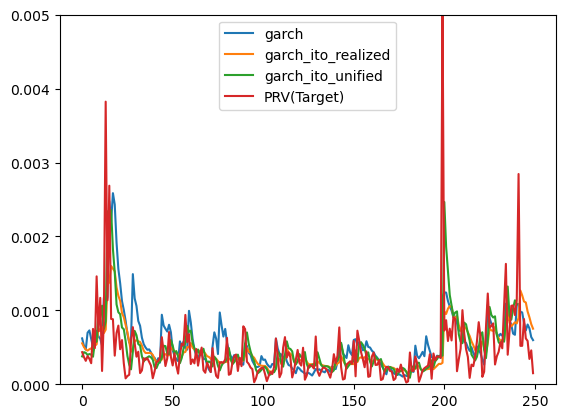

In [15]:
df_est_vols = pd.DataFrame({k:v["vol_pred"] for k,v in dfs.items()})
df_est_vols["PRV(Target)"] = x_prv
df_est_vols.plot(ylim=(0,5e-3))

<Axes: >

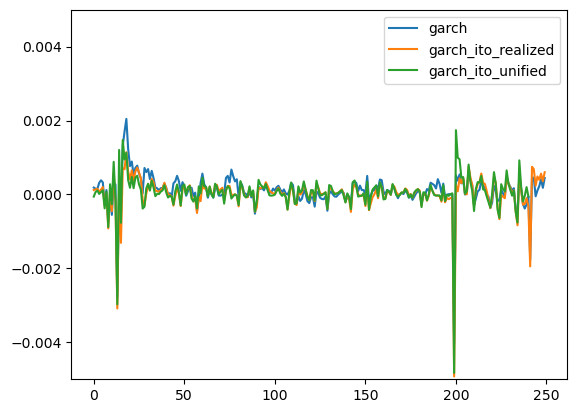

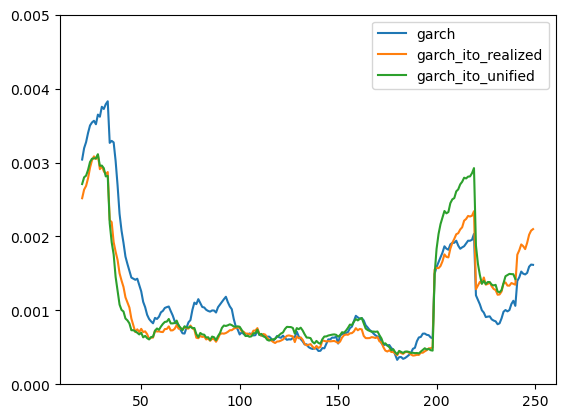

In [39]:
df_est_vols = pd.DataFrame({k:v["vol_pred"] for k,v in dfs.items()})
df_est_vols = df_est_vols.subtract(x_prv, axis=0)
# df_est_vols
df_est_vols.plot(ylim=(-5e-3,5e-3))
df_est_vols.abs().rolling(21).mean().multiply(np.sqrt(21)).plot(ylim=(0,5e-3))

garch                 1.086542e-07
garch_ito_realized    1.041492e-07
garch_ito_unified     1.122447e-07
dtype: float64


<Axes: title={'center': 'MSPE error to PRV'}>

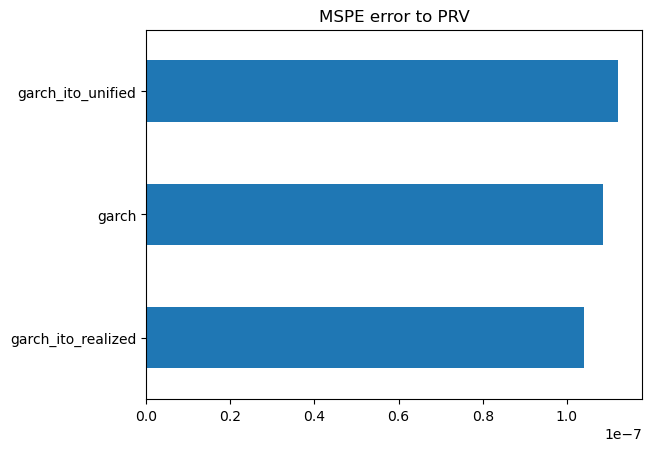

In [ ]:
df_MSPE = pd.DataFrame({k:v["vol_pred"] for k,v in dfs.items()})
df_MSPE = (df_MSPE).subtract(x_prv, axis=0).pow(2)
df_MSPE = df_MSPE.clip(-df_MSPE.std(axis=0), df_MSPE.std(axis=0), axis=1).mean(axis=0)
print(df_MSPE)
df_MSPE.sort_values().plot.barh(title="MSPE error to PRV")

In [19]:
-df_MSPE.std(axis=0)

garch                -0.000001
garch_ito_realized   -0.000002
garch_ito_unified    -0.000002
dtype: float64

garch_preaveraging                 7.430877e-12
garch_ito_realized_preaveraging    2.683668e-12
garch_ito_unified_preaveraging     3.301745e-12
dtype: float64


<Axes: title={'center': 'MSPE error to PRV'}>

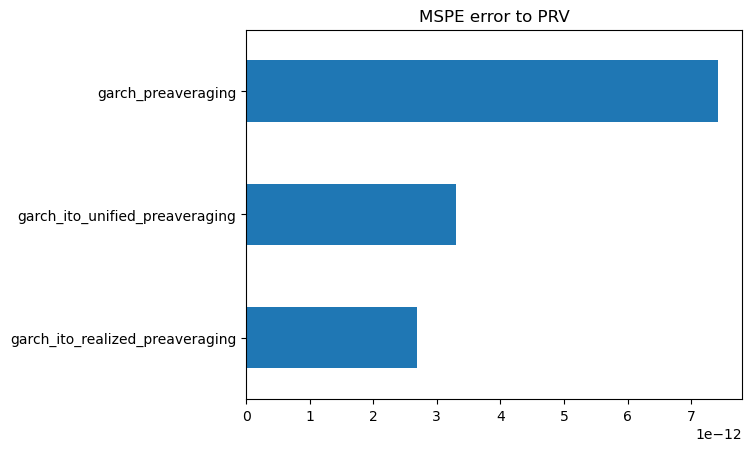

In [145]:
df_MSPE = pd.DataFrame({k:v["vol_pred"] for k,v in dfs.items()})
df_MSPE = (df_MSPE).subtract(x_prv, axis=0).iloc[-50:].pow(2).mean(axis=0)
print(df_MSPE)
df_MSPE.sort_values().plot.barh(title="MSPE error to PRV")

In [120]:
(df_MSPE - x_prv)

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,garch_ito_realized_preaveraging,garch_ito_unified_preaveraging,garch_preaveraging
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
